# EPL QUARANTINE POOLS

At the start of the COVID-19 lockdown in the UK, the English Premier League was left with 92 games to play - but no certainty that they could get through and bring the season to an end.

One way to mitigate the risk would have been to put the teams into a set of 'bubbles', each containing half of the competition's 20 teams.
 
So was there a set of bubbles (or pools) that would do this?

This analysis uses combination theory and dataviz to find out. 

Due to the many trillions of calculations that would have been required, it also finds time-saving workarounds to get to the a positive conclusion.

In [3]:
# load libraries
import itertools
import pandas as pd
import numpy as np
import time
import matplotlib.pylab as plt
import statistics
from collections import Counter

In [4]:
# load teams
teams = sorted(['MCI', 'NEW', 'EVE', 'LIV', 'BUR', 'WOL', 'LEI', 'SHE', 'NOR', 'MUN', 'WAT', 'BRI', 'AST', 'WES', 'TOT', 'AFC', 'CHE', 'SOU', 'CRY', 'ARS'])
print(teams,)  #orders alphabetically

['AFC', 'ARS', 'AST', 'BRI', 'BUR', 'CHE', 'CRY', 'EVE', 'LEI', 'LIV', 'MCI', 'MUN', 'NEW', 'NOR', 'SHE', 'SOU', 'TOT', 'WAT', 'WES', 'WOL']


**How many combinations of teams are there?**

In [5]:
poss = set(itertools.combinations(teams, 10))      # all 184,756 combos of available teams. sets are easier to deal with for this task
print(f'There are {len(poss)} possible combinations of teams.')

There are 184756 possible combinations of teams.


**184,756**

That's a lot of possibilities to explore! 

In [6]:
# import the remaining 92 games and format them into the 3 letter team codes (eg LIV)
with open('remaining_games.csv', 'r') as f:
    g = f.read()
    g = g.replace('\t','').replace(' ','').replace('Manchester','M')
    g = g.split('\n')
    
    remaining = []
    for n in range(0, len(g)):
        ha = g[n].split(',')
        home = ha[0][0:3].upper()
        away = ha[1][0:3].upper()
        game = [home,away]
        remaining.append(game)
        
print(f'There are {len(remaining)} games remaining.')

There are 92 games remaining.


### A Look At The Remaining Games

Before we go any further, let's have a quick look at the games that each team has left to play, first as a DataFrame, then in graphically formation.

In [7]:
games = set(tuple(x) for x in remaining)

teamsdf = pd.DataFrame(teams, columns = ['Team'])

home, away  = [], []
for team in teams:
    tH, tA = [], []
    
    for game in games:
        if team in game[0]:
            tH.append(game[1])
        if team in game[1]:
            tA.append(game[0])
            
    home.append(tH)
    away.append(tA)
    
teamsdf['Home'] = home
teamsdf['H'] = teamsdf.Home.str.len()
teamsdf['Away'] = away
teamsdf['A'] = teamsdf.Away.str.len()
teamsdf['Ttl'] = teamsdf.H + teamsdf.A

teamsdf

,Team,Home,H,Away,A,Ttl
0,AFC,"[LEI, NEW, CRY, SOU, TOT]",5,"[MCI, WOL, EVE, MUN]",4,9
1,ARS,"[LIV, NOR, LEI, WAT]",4,"[BRI, TOT, AST, SOU, MCI, WOL]",6,10
2,AST,"[CHE, WOL, ARS, SHE, MUN, CRY]",6,"[LIV, WES, NEW, EVE]",4,10
3,BRI,"[ARS, LIV, NEW, MCI, MUN]",5,"[BUR, LEI, SOU, NOR]",4,9
4,BUR,"[WOL, BRI, WAT, SHE]",4,"[WES, MCI, CRY, LIV, NOR]",5,9
5,CHE,"[WAT, WOL, NOR, MCI]",4,"[AST, SHE, LIV, WES, CRY]",5,9
6,CRY,"[TOT, BUR, CHE, MUN]",4,"[AFC, AST, LEI, WOL, LIV]",5,9
7,EVE,"[LEI, LIV, AFC, SOU, AST]",5,"[NOR, SHE, TOT, WOL]",4,9
8,LEI,"[SHE, MUN, BRI, CRY]",4,"[AFC, WAT, EVE, TOT, ARS]",5,9
9,LIV,"[CHE, AST, BUR, CRY]",4,"[ARS, EVE, MCI, BRI, NEW]",5,9


And now graphically.

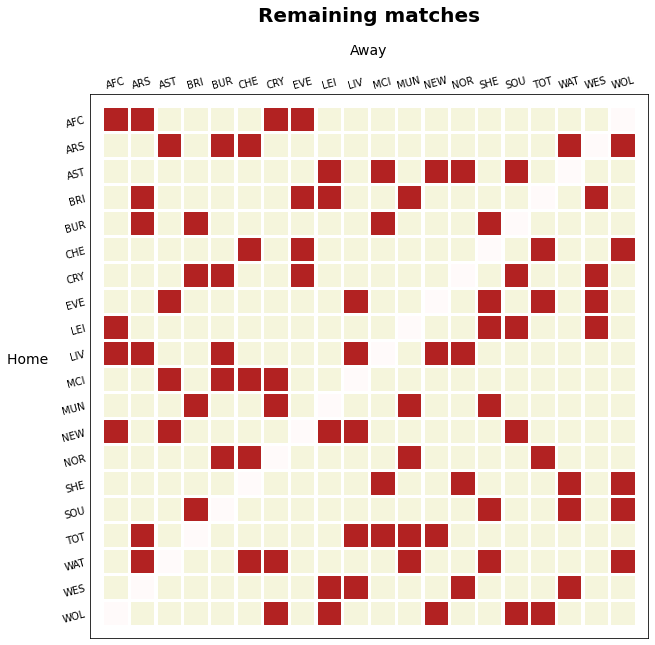

In [8]:
fig, ax = plt.subplots()

x = range(len(teams))

# see who plays who and define a colour
i = 0
for team in teams:
    
    colors = []
        
    for team2 in teams:
            
        if team2 == team:
            
            c = 'snow'
            
        else:
        
            c = 'beige'       # start with the assumption that the two teams do not play

            for game in games:
                
                if team in game[0] and team2 in game[1]:
                    c = 'firebrick'
                
        colors.append(c)
                           
    y = [i] * len(teams)        
        
    ax.scatter(x, y, marker = 's', s = 500, color = colors)
    
    i += 1

# titles
plt.title('Remaining matches', weight='bold', size='20')
plt.xlabel('\nAway\n', size=14)
ax.xaxis.set_label_position('top') 
plt.ylabel('Home             ',  rotation=0, size=14)

# axes
ax.xaxis.tick_top()
ax.set_xticklabels(teams, rotation=15)
ax.set_xticks(x[::1])
ax.set_yticklabels(reversed(teams), rotation=15)
ax.set_yticks(x[::1])
ax.tick_params(axis=u'both', which=u'both',length=0)    # hides ticks

plt.rcParams["font.family"] = "Arial"

fig.set_size_inches(10, 10)
plt.show()

Each team needs to play roughly the same amount of games, and there is no obvious pattern showing how to divide the teams.

## BUILDING BUBBLES

Now, let's take a look at each of these 184,756 bubbles and see how many games they might be able to play. 

It usually takes less than 90 seconds to calculate all that (even on my tired laptop).

In [9]:
#### DF version

# games are each given an id number

print('0', end=' ')     # to show it has started, as it sometimes gets jammed

start_time = time.time()

l1, l2, l3  = [], [], []

groupID = 0
for combo in poss:
    
    if groupID % 10000 == 0:
        print('>', end=' ')
                
    playable_mini = []
    
    for game in remaining:
        
        gameID = remaining.index(game)
        
        if game[0] in combo and game[1] in combo:
            playable_mini.append(gameID)
        elif game[0] not in combo and game[1] not in combo:
            playable_mini.append(gameID)
            
    l1.append(groupID)
    l2.append(combo)
    l3.append(playable_mini)
          
    groupID += 1
           
print(f"{groupID} in %s seconds =^_^=" % (time.time() - start_time))

0 > > > > > > > > > > > > > > > > > > > 184756 in 124.96785497665405 seconds =^_^=


In [10]:
# put into a dataframe

l1234 = list(zip(l1,l2,l3))
bubbledf = pd.DataFrame(l1234, columns=['GroupID','PoolA1','Games'])
bubbledf['Ttl'] = bubbledf.Games.str.len()
pd.set_option('display.max_colwidth', 100)
bubbledf

,GroupID,PoolA1,Games,Ttl
0,0,"(AFC, AST, BRI, BUR, LEI, MCI, MUN, NOR, WAT, WES)","[1, 3, 4, 10, 15, 17, 19, 21, 23, 25, 33, 35, 36, 41, 44, 45, 47, 48, 49, 50, 52, 53, 56, 58, 59...",44
1,1,"(AFC, ARS, CHE, EVE, MCI, NEW, NOR, TOT, WAT, WES)","[0, 11, 12, 13, 15, 16, 20, 21, 24, 25, 26, 27, 28, 29, 32, 33, 37, 38, 39, 40, 42, 46, 47, 49, ...",48
2,2,"(AST, BRI, CHE, CRY, LIV, MUN, NOR, SHE, TOT, WAT)","[0, 4, 6, 8, 9, 11, 15, 18, 19, 20, 23, 25, 28, 31, 32, 34, 35, 39, 40, 41, 43, 44, 45, 46, 47, ...",40
3,3,"(AFC, CRY, LEI, MCI, MUN, NEW, NOR, SOU, WAT, WES)","[1, 2, 5, 6, 7, 10, 11, 22, 23, 26, 28, 32, 33, 34, 36, 37, 38, 39, 41, 46, 47, 50, 51, 52, 54, ...",47
4,4,"(ARS, BRI, BUR, EVE, MUN, NEW, NOR, SHE, TOT, WAT)","[3, 5, 6, 7, 8, 9, 13, 15, 16, 17, 18, 20, 23, 25, 26, 27, 29, 30, 33, 34, 35, 37, 38, 39, 44, 4...",42
...,...,...,...,...
184751,184751,"(AFC, AST, BRI, CHE, EVE, LIV, MUN, SHE, SOU, TOT)","[0, 1, 4, 6, 8, 9, 10, 11, 17, 20, 23, 24, 25, 27, 32, 33, 36, 37, 39, 41, 42, 43, 45, 46, 47, 4...",46
184752,184752,"(AFC, ARS, BRI, BUR, EVE, NEW, SOU, TOT, WAT, WOL)","[5, 6, 11, 15, 16, 17, 18, 19, 20, 22, 28, 29, 30, 33, 37, 39, 41, 42, 44, 45, 49, 56, 57, 58, 5...",43
184753,184753,"(AFC, ARS, AST, BRI, CHE, EVE, LEI, MUN, NEW, SHE)","[2, 3, 4, 5, 6, 8, 11, 12, 14, 15, 17, 20, 21, 22, 24, 25, 28, 30, 31, 34, 36, 43, 47, 48, 49, 5...",43
184754,184754,"(AFC, AST, BRI, EVE, LEI, LIV, MCI, NEW, SHE, SOU)","[3, 8, 9, 10, 11, 12, 14, 17, 21, 24, 27, 28, 29, 30, 31, 34, 39, 40, 41, 44, 45, 46, 47, 48, 51...",49


In [11]:
mx = bubbledf['Ttl'].max()
mn = bubbledf['Ttl'].min()

print(f'The most games that could be played is {mx}.  That leaves {len(remaining) - mx} left to be played.\n')
print(f'The min number of games playable is {mn}.')

The most games that could be played is 60.  That leaves 32 left to be played.

The min number of games playable is 28.


As we can see below, there are eight bubbles that could get 60 games played. 

In [12]:
xdf = bubbledf.loc[bubbledf['Ttl'] >= 60].sort_values(by=['Ttl'], ascending=False)

xdf

,GroupID,PoolA1,Games,Ttl
26992,26992,"(AFC, AST, CRY, EVE, LEI, MUN, SHE, SOU, TOT, WOL)","[0, 4, 5, 7, 9, 11, 16, 17, 18, 20, 23, 26, 27, 29, 30, 31, 32, 33, 35, 36, 37, 40, 42, 45, 46, ...",60
28684,28684,"(ARS, BRI, BUR, CHE, LIV, MCI, NEW, NOR, WAT, WES)","[0, 4, 5, 7, 9, 11, 16, 17, 18, 20, 23, 26, 27, 29, 30, 31, 32, 33, 35, 36, 37, 40, 42, 45, 46, ...",60
28912,28912,"(AFC, AST, CHE, CRY, EVE, LEI, MUN, SHE, TOT, WOL)","[0, 2, 4, 5, 6, 7, 9, 11, 17, 18, 19, 20, 22, 23, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 42, 44...",60
52563,52563,"(ARS, BRI, BUR, CHE, LIV, MCI, NOR, SOU, WAT, WES)","[0, 2, 3, 4, 5, 7, 9, 11, 14, 16, 17, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36...",60
53259,53259,"(ARS, BRI, BUR, CHE, LIV, MCI, NEW, NOR, SOU, WAT)","[0, 2, 4, 5, 7, 8, 9, 11, 12, 16, 17, 18, 19, 20, 22, 23, 26, 27, 30, 31, 33, 34, 35, 36, 37, 40...",60
75896,75896,"(AFC, AST, CRY, EVE, LEI, MUN, NEW, SHE, TOT, WOL)","[0, 2, 3, 4, 5, 7, 9, 11, 14, 16, 17, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36...",60
114070,114070,"(AFC, AST, CRY, EVE, LEI, MUN, SHE, TOT, WES, WOL)","[0, 2, 4, 5, 7, 8, 9, 11, 12, 16, 17, 18, 19, 20, 22, 23, 26, 27, 30, 31, 33, 34, 35, 36, 37, 40...",60
154245,154245,"(ARS, BRI, BUR, LIV, MCI, NEW, NOR, SOU, WAT, WES)","[0, 2, 4, 5, 6, 7, 9, 11, 17, 18, 19, 20, 22, 23, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 42, 44...",60


In the chart below, which shows the 100 best results in descending order, you can see how far from achieving our target we still are (represented by the gold line).

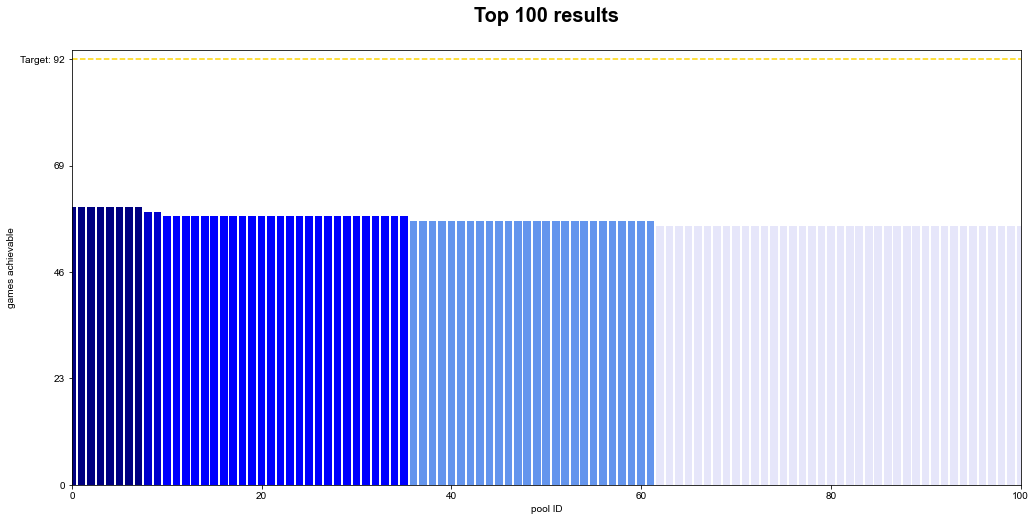

In [13]:
xdf = bubbledf.loc[bubbledf['Ttl'] >= 55].sort_values(by=['Ttl'], ascending=False)

fig, ax = plt.subplots()
plt.title('Top 100 results\n', weight='bold', size=20)

y = xdf['Ttl']
x = range(len(xdf['Ttl']))

colors = []

for value in y:

    if value >= 60:
        colors.append('navy')
    elif value == 59:
        colors.append('mediumblue')
    elif value == 58:
        colors.append('blue')
    elif value == 57:
        colors.append('cornflowerblue')
    elif value <= 56:
        colors.append('lavender')
        
        
ax = ax.bar(x, y, color=colors)
plt.xlabel('pool ID')
plt.ylabel('games achievable')
plt.ylim(0,94)
plt.xlim(0,100)

y_values = ["0", "23", "46", "69", "Target: 92"]
y_axis = np.arange(0, 94, 23)
plt.yticks(y_axis, y_values)


plt.axhline(92, color='gold', linestyle='dashed')

plt.rcParams["font.family"] = "Arial"

fig.set_size_inches(17, 8)
plt.show()

Here we can see the frequency of each total the bubbles produced: a beautiful bell curve

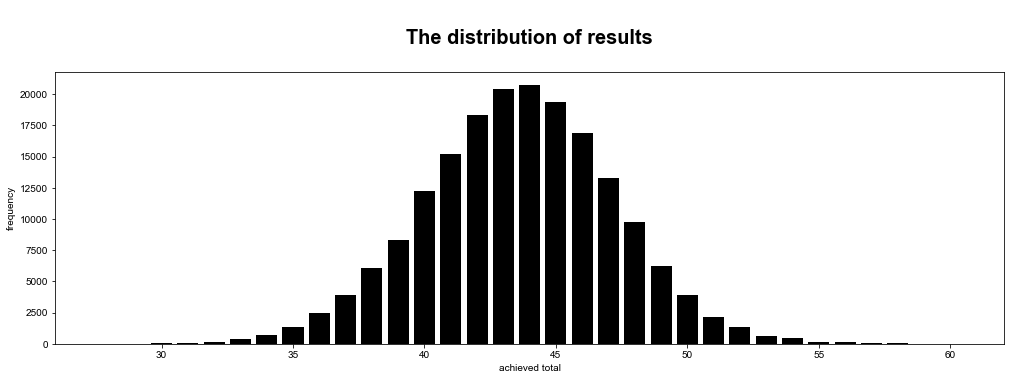

In [14]:
fig, ax = plt.subplots()

plt.title('\nThe distribution of results\n', weight='bold', size=20)

x = list(bubbledf['Ttl'])
freqdf = pd.DataFrame(Counter(x).items(), columns=['Total','Freq'])

x = freqdf['Total']
y = freqdf['Freq']
ax = ax.bar(x, y, color='k')
plt.xlabel('achieved total')
plt.ylabel('frequency')


plt.rcParams["font.family"] = "Arial"

fig.set_size_inches(17, 5)
plt.show()

## DOUBLE BUBBLES

Even with the best result (60), we don't even get through two-thirds of the remaining games.

But what if we went through this process again with each set of bubbles' remaining games?

That would involve looking at each groups' remaining games, and calculating again. 

That's 184k x 184k calculations: which is over 34 trillion! 

At 90 seconds each round, my calculator says that would take 181 days.

Actually the initial script I wrote was set to take 42 days. After some tweaks, that came down 13. 

Even with a very fast computer, this was going to take too long. 
 

### THREE METHODS FOR FASTER COMPUTATIONS

### Removing 'complements'

Every time we create a subset, we leave behind a subset known as the complement.

When we are split a set in half, that means the complement is simply another subset that will be calculated elsewhere.

Therefore, we need to stop doubling up our iterations, by removing these complements (whose games are counted already in the primary subset's tally).

In [15]:
# excluding complements, 

# start by ordering alphabetically so we can do a simple sort that stops at the half way mark

print('.')

start_time = time.time()

teams_sortedset = sorted(set(teams))
poss = list(itertools.combinations(teams_sortedset, 10))

A1, A2 = [], []   

for i in range(0, int(len(poss) /2 ) ):
    p = poss[i]
    
    p_set = set(p)
    t_set = set(teams)
    
    x = t_set - p_set
    
    p = list(p)
    x = sorted(list(x))
    
    A1.append(p)
    A2.append(x)
 
print(f'{len(A1)} + {len(A2)} = {len(A1) + len(A2)}. Calculated in {time.time() - start_time} seconds.')

.
92378 + 92378 = 184756. Calculated in 1.5243866443634033 seconds.


In [16]:
nocompsdf = pd.DataFrame()
nocompsdf['A1'] = A1
nocompsdf['A2'] = A2
nocompsdf

,A1,A2
0,"[AFC, ARS, AST, BRI, BUR, CHE, CRY, EVE, LEI, LIV]","[MCI, MUN, NEW, NOR, SHE, SOU, TOT, WAT, WES, WOL]"
1,"[AFC, ARS, AST, BRI, BUR, CHE, CRY, EVE, LEI, MCI]","[LIV, MUN, NEW, NOR, SHE, SOU, TOT, WAT, WES, WOL]"
2,"[AFC, ARS, AST, BRI, BUR, CHE, CRY, EVE, LEI, MUN]","[LIV, MCI, NEW, NOR, SHE, SOU, TOT, WAT, WES, WOL]"
3,"[AFC, ARS, AST, BRI, BUR, CHE, CRY, EVE, LEI, NEW]","[LIV, MCI, MUN, NOR, SHE, SOU, TOT, WAT, WES, WOL]"
4,"[AFC, ARS, AST, BRI, BUR, CHE, CRY, EVE, LEI, NOR]","[LIV, MCI, MUN, NEW, SHE, SOU, TOT, WAT, WES, WOL]"
...,...,...
92373,"[AFC, MCI, MUN, NEW, NOR, SOU, TOT, WAT, WES, WOL]","[ARS, AST, BRI, BUR, CHE, CRY, EVE, LEI, LIV, SHE]"
92374,"[AFC, MCI, MUN, NEW, SHE, SOU, TOT, WAT, WES, WOL]","[ARS, AST, BRI, BUR, CHE, CRY, EVE, LEI, LIV, NOR]"
92375,"[AFC, MCI, MUN, NOR, SHE, SOU, TOT, WAT, WES, WOL]","[ARS, AST, BRI, BUR, CHE, CRY, EVE, LEI, LIV, NEW]"
92376,"[AFC, MCI, NEW, NOR, SHE, SOU, TOT, WAT, WES, WOL]","[ARS, AST, BRI, BUR, CHE, CRY, EVE, LEI, LIV, MUN]"


In [17]:
#### DF version: First BUBBLE

# now run this code for (the new) A1 

print('0', end=' ')     # to show it has started.Sometimes it jams

start_time = time.time()

l1, l2, l3  = [], [], []

groupID = 0
for combo in A1:
    
    if groupID % 10000 == 0:
        print('>', end=' ')
                
    playable_mini = []
    
    for game in remaining:
        
        gameID = remaining.index(game)
        
        if game[0] in combo and game[1] in combo:
            playable_mini.append(gameID)
        elif game[0] not in combo and game[1] not in combo:
            playable_mini.append(gameID)
            
    l1.append(groupID)
    l2.append(combo)
    l3.append(playable_mini)
          
    groupID += 1
           
print(f"{groupID} in %s seconds =^_^=" % (time.time() - start_time))

0 > > > > > > > > > > 92378 in 41.3725163936615 seconds =^_^=


Calculating the initial set of games is now done in half the time! 

In [18]:
nocompsdf['GroupID'] = l1
nocompsdf['Games'] = l3
nocompsdf['Ttl'] = nocompsdf.Games.str.len()
nocompsdf = nocompsdf[['GroupID','A1','A2','Games','Ttl']]
nocompsdf

,GroupID,A1,A2,Games,Ttl
0,0,"[AFC, ARS, AST, BRI, BUR, CHE, CRY, EVE, LEI, LIV]","[MCI, MUN, NEW, NOR, SHE, SOU, TOT, WAT, WES, WOL]","[2, 3, 5, 6, 7, 8, 9, 10, 12, 15, 20, 21, 22, 23, 24, 31, 32, 34, 37, 39, 43, 44, 46, 47, 50, 51...",44
1,1,"[AFC, ARS, AST, BRI, BUR, CHE, CRY, EVE, LEI, MCI]","[LIV, MUN, NEW, NOR, SHE, SOU, TOT, WAT, WES, WOL]","[0, 2, 3, 4, 5, 6, 7, 8, 9, 12, 16, 20, 21, 22, 23, 24, 31, 32, 37, 43, 44, 47, 50, 52, 53, 55, ...",39
2,2,"[AFC, ARS, AST, BRI, BUR, CHE, CRY, EVE, LEI, MUN]","[LIV, MCI, NEW, NOR, SHE, SOU, TOT, WAT, WES, WOL]","[2, 3, 5, 6, 7, 8, 12, 21, 22, 23, 24, 25, 30, 31, 32, 34, 36, 37, 43, 44, 46, 47, 49, 50, 52, 5...",40
3,3,"[AFC, ARS, AST, BRI, BUR, CHE, CRY, EVE, LEI, NEW]","[LIV, MCI, MUN, NOR, SHE, SOU, TOT, WAT, WES, WOL]","[2, 5, 6, 7, 8, 9, 12, 14, 20, 21, 22, 23, 24, 28, 30, 31, 34, 37, 43, 44, 47, 50, 52, 55, 56, 6...",36
4,4,"[AFC, ARS, AST, BRI, BUR, CHE, CRY, EVE, LEI, NOR]","[LIV, MCI, MUN, NEW, SHE, SOU, TOT, WAT, WES, WOL]","[3, 5, 6, 7, 8, 9, 12, 13, 20, 21, 22, 23, 24, 27, 30, 31, 32, 34, 35, 37, 43, 44, 46, 50, 52, 5...",40
...,...,...,...,...,...
92373,92373,"[AFC, MCI, MUN, NEW, NOR, SOU, TOT, WAT, WES, WOL]","[ARS, AST, BRI, BUR, CHE, CRY, EVE, LEI, LIV, SHE]","[2, 5, 6, 8, 9, 10, 11, 12, 15, 18, 21, 22, 24, 28, 31, 32, 34, 36, 37, 38, 39, 42, 43, 44, 46, ...",47
92374,92374,"[AFC, MCI, MUN, NEW, SHE, SOU, TOT, WAT, WES, WOL]","[ARS, AST, BRI, BUR, CHE, CRY, EVE, LEI, LIV, NOR]","[3, 5, 6, 8, 9, 10, 12, 13, 15, 18, 20, 21, 22, 23, 24, 27, 28, 31, 32, 34, 35, 36, 37, 39, 42, ...",48
92375,92375,"[AFC, MCI, MUN, NOR, SHE, SOU, TOT, WAT, WES, WOL]","[ARS, AST, BRI, BUR, CHE, CRY, EVE, LEI, LIV, NEW]","[2, 5, 6, 8, 9, 10, 12, 14, 15, 18, 20, 21, 22, 23, 24, 31, 34, 36, 37, 39, 42, 43, 44, 47, 50, ...",44
92376,92376,"[AFC, MCI, NEW, NOR, SHE, SOU, TOT, WAT, WES, WOL]","[ARS, AST, BRI, BUR, CHE, CRY, EVE, LEI, LIV, MUN]","[2, 3, 5, 6, 8, 10, 12, 15, 18, 21, 22, 23, 24, 25, 28, 31, 32, 34, 37, 39, 42, 43, 44, 46, 47, ...",46


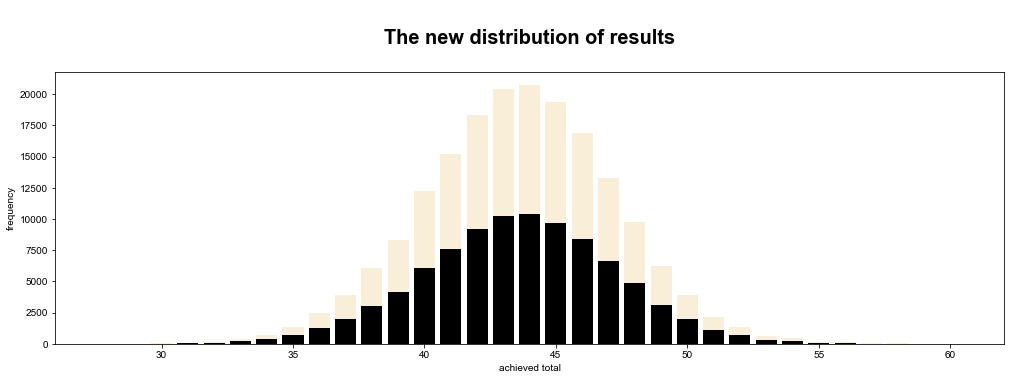

In [19]:
fig, ax = plt.subplots()

plt.title('\nThe new distribution of results\n', weight='bold', size=20)


#back bars
x = list(bubbledf['Ttl'])
freqdf = pd.DataFrame(Counter(x).items(), columns=['Total','Freq'])
plt.bar(freqdf['Total'], freqdf['Freq'], color='wheat',  alpha=0.5)

#front bards
x = list(nocompsdf['Ttl'])
freq2df = pd.DataFrame(Counter(x).items(), columns=['Total','Freq'])
plt.bar(freq2df['Total'], freq2df['Freq'], color='k')


plt.xlabel('achieved total')
plt.ylabel('frequency')

fig.set_size_inches(17, 5)
plt.show()

We've mainted the bell curve - so it looks like the calculations are correct. But we can really see how much we've reduced the workload.

And we now have 4 Bubbles of 60 games, not 8.

In [20]:
Xdf = nocompsdf.loc[nocompsdf['Ttl'] == 60]

pd.set_option('display.max_colwidth', 1000)

Xdf

,GroupID,A1,A2,Games,Ttl
61879,61879,"[AFC, AST, CHE, CRY, EVE, LEI, MUN, SHE, TOT, WOL]","[ARS, BRI, BUR, LIV, MCI, NEW, NOR, SOU, WAT, WES]","[0, 2, 4, 5, 6, 7, 9, 11, 17, 18, 19, 20, 22, 23, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 42, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 61, 62, 65, 66, 67, 70, 71, 74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]",60
65422,65422,"[AFC, AST, CRY, EVE, LEI, MUN, NEW, SHE, TOT, WOL]","[ARS, BRI, BUR, CHE, LIV, MCI, NOR, SOU, WAT, WES]","[0, 2, 3, 4, 5, 7, 9, 11, 14, 16, 17, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 40, 42, 47, 48, 49, 50, 51, 52, 53, 54, 56, 58, 61, 62, 64, 65, 66, 67, 69, 70, 71, 75, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88]",60
65458,65458,"[AFC, AST, CRY, EVE, LEI, MUN, SHE, SOU, TOT, WOL]","[ARS, BRI, BUR, CHE, LIV, MCI, NEW, NOR, WAT, WES]","[0, 4, 5, 7, 9, 11, 16, 17, 18, 20, 23, 26, 27, 29, 30, 31, 32, 33, 35, 36, 37, 40, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 61, 62, 64, 65, 66, 67, 71, 72, 74, 75, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90]",60
65464,65464,"[AFC, AST, CRY, EVE, LEI, MUN, SHE, TOT, WES, WOL]","[ARS, BRI, BUR, CHE, LIV, MCI, NEW, NOR, SOU, WAT]","[0, 2, 4, 5, 7, 8, 9, 11, 12, 16, 17, 18, 19, 20, 22, 23, 26, 27, 30, 31, 33, 34, 35, 36, 37, 40, 42, 46, 47, 49, 50, 51, 52, 53, 54, 57, 58, 61, 62, 64, 65, 66, 67, 70, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 91]",60


Now are dealing 92,378 results, instead of twice that much. 

However, that would still take at least two days for my computer to process (on my laptop). A huge improvement, but still too long.

## No backtracking

Bubble 0 can play 44 games. 

Bubble 1 can play 39 games: 33 that are playable by Bubble 0, and 6 that aren't. 

As a double-bubble, they can play 50 games.

In [21]:
a = set(nocompsdf['Games'].iloc[0])
b = set(nocompsdf['Games'].iloc[1])

AB = list(a) + list(b - a)

len(a), len(b), len(list(b - a)), len(AB)

(44, 39, 6, 50)

What about going the other way?

Bubble 1 can play 39 games. Bubble 0 can play 44 games: 33 that are playable by Bubble 0, and 11 that aren't. 

As before, that totals 50 games.

In [22]:
BA = list(b) + list(a - b)

len(b), len(a), len(list(a - b)), len(BA)

(39, 44, 11, 50)

What this shows is that there is no need for 'backtracking' calculations. 

Once Group 0 has iterated through all its possible combinations, there is no need for other Bubbles to take it into consideration.

There is also no need for each Bubble to calculate against itself.

So by the time we get to the penultimate Bubble, the only Bubble it needs to check itself with the last one.

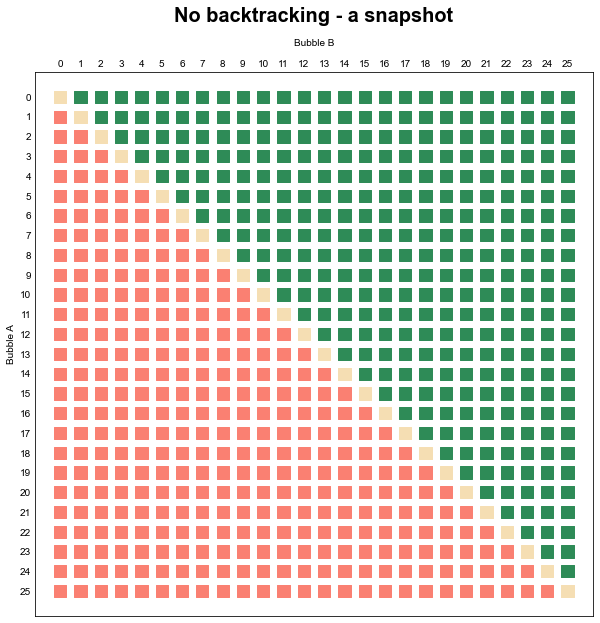

So instead of 676 calculations needed for this example group, we only need 325, or 48.08 per cent.




In [23]:
l = 26
A = [n for n in range(l)]

fig, ax = plt.subplots()

n, m, i = 0, 0, 0

for a in A:
    
    colors = []
        
    for b in A:
        
        m += 1
     
        if b < a :
            c = 'seagreen'
            
        elif b == a :
            c = 'wheat'
            
        elif b > a :
            c = 'salmon'
            n += 1

        colors.append(c)
                    
    B = [a] * len(A)    
    
    colors = [x for x in reversed(colors)]
        
    ax.scatter(B, A, marker = 's', s = 150, color = colors)
    
    i += 1


# other plotting lines
    
plt.title("No backtracking - a snapshot", weight='bold', size='20')
plt.xlabel('\nBubble B\n')
ax.xaxis.set_label_position('top') 
plt.ylabel('Bubble A')

# axes
ax.xaxis.tick_top()
ax.set_xticklabels(A)
ax.set_xticks(A[::1])

ax.set_yticklabels(reversed(A))
ax.set_yticks(A[::1])

ax.tick_params(axis=u'both', which=u'both',length=0)    # hides ticks

fig.set_size_inches(10, 10)
    
plt.show()

print(f'So instead of {m} calculations needed for this example group, we only need {n}, or {round(n/m*100,2)} per cent.\n\n')



By not 'backtracking', this would significantly decreased the time to calculate for each Bubbles other possibilities. 

Without it, we'd have to make over 8 trillion caluclations (92378 x 92378)!

That would be over 34 trillion if we'd left the complements in. 

Instead, there are now just over 4 trillion possibilities. 

That's just 12.02 per cent of what we started with.

Below is a quick timetest (involing smaller bubbles) to show how much quicker it gets as it goes through the calculations.

In [26]:
### 4 in pool version
## first part = recalculating 

poss = set(itertools.combinations(teams, 3))  

start_time = time.time()

playables = {}
pools = {}

groupID = 0
for combo in poss:
                
    playable_mini = []
        
    for game in remaining:
        
        gameID = remaining.index(game)
        
        if game[0] in combo and game[1] in combo:
            playable_mini.append(gameID)
        elif game[0] not in combo and game[1] not in combo:
            playable_mini.append(gameID)
            
    playables[groupID] = playable_mini
    
    pools[groupID] = {combo}
        
    groupID += 1
           
# this sorts out pool B

poolBs = {}
start_time = time.time()

timetest = {}
ETA = []
for groupID in playables:
    cogroups = []
    a = playables[groupID]   
    best = 0       
    
    j = groupID + 1
    while j < len(playables):                     
        b = playables[j]   
        ab = a + list(set(b) - set(a))
        if len(ab) > best:
            best = len(ab)       
            cogroups.append(j)          
        j += 1    
    
    poolBs[groupID] = dict(best = best, cogroups = cogroups)   
    
    if groupID % 40 == 0:
        gap = time.time() - start_time
        timetest[groupID] = gap
        if groupID != 0:
            eta = (len(playables) / groupID) * gap
        else:
            eta = len(playables) * gap
            
        ETA.append(eta)
        print(f'{groupID} Bubbles done in {gap} seconds.\t  ETA:{eta}')
        
print("--- %s seconds ---" % (time.time() - start_time))

# note this is an older version of the script used in the main section

0 Bubbles done in 0.012003183364868164 seconds.	  ETA:13.683629035949707
40 Bubbles done in 0.5362644195556641 seconds.	  ETA:15.283535957336426
80 Bubbles done in 1.0452659130096436 seconds.	  ETA:14.89503926038742
120 Bubbles done in 1.5523953437805176 seconds.	  ETA:14.747755765914917
160 Bubbles done in 2.00763201713562 seconds.	  ETA:14.304378122091293
200 Bubbles done in 2.4596261978149414 seconds.	  ETA:14.019869327545166
240 Bubbles done in 2.9497487545013428 seconds.	  ETA:14.011306583881378
280 Bubbles done in 3.413867235183716 seconds.	  ETA:13.899316600390842
320 Bubbles done in 3.8190901279449463 seconds.	  ETA:13.605508580803871
360 Bubbles done in 4.201065301895142 seconds.	  ETA:13.303373456001282
400 Bubbles done in 4.575160503387451 seconds.	  ETA:13.039207434654235
440 Bubbles done in 4.919369459152222 seconds.	  ETA:12.745639053258028
480 Bubbles done in 5.248456239700317 seconds.	  ETA:12.465083569288254
520 Bubbles done in 5.540408134460449 seconds.	  ETA:12.14627

As you can see, this speeds up significantly towards the end, because it doesn't have to backtrack.

In [27]:
calcs = [x for x in timetest.keys()]
stamps = [x for x in timetest.values()]

timetestdf = pd.DataFrame([])
timetestdf['calcs'] = calcs
timetestdf['stamps'] = stamps
timetestdf['gap'] = timetestdf['stamps'].diff()
timetestdf['5roll'] = timetestdf['gap'].rolling(window=5).mean()
timetestdf['moving'] = timetestdf['gap'].cumsum() / (timetestdf['calcs']/50)
timetestdf['ETA'] = ETA

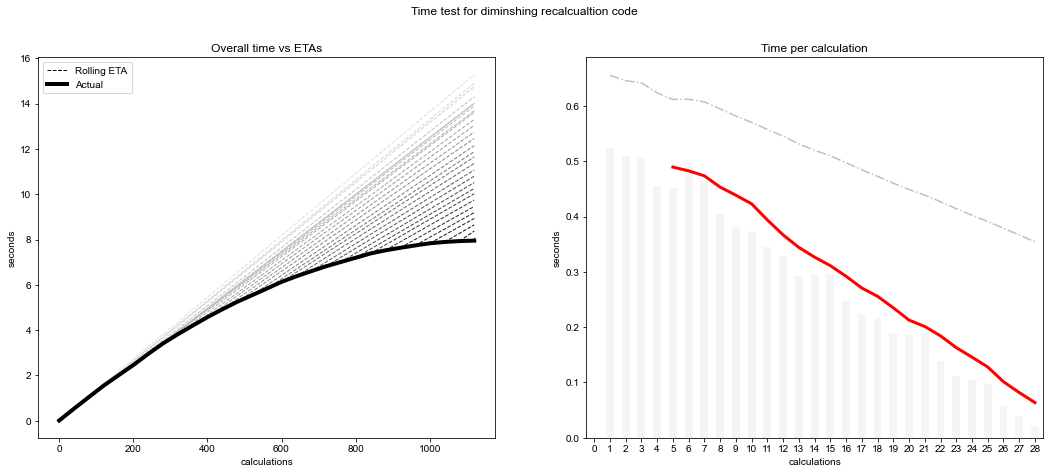

In [28]:
# then, plotting
    
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Time test for diminshing recalcualtion code')

ax1.set_title("Overall time vs ETAs")
ax1.set_ylabel('seconds')
ax1.set_xlabel('calculations')



for i in range(len(ETA)):

    
    x = [calcs[i], calcs[-1]]
    y = [stamps[i], ETA[i]]
    
    try:
        r = (ETA[i] - ETA[-1]) / (ETA[1] - ETA[-1])
        r = r - (r/8)
    except:
        r = 0
        
    if r < 0:
        r = 1
        
    c = r,r,r
        
    projected, = ax1.plot(x, y, linewidth=1, c=np.array(c), linestyle = 'dashed', label = 'Rolling ETA')
    
 
    
actual, = ax1.plot(calcs, stamps, linewidth=4, color = 'k', label = 'Actual')

ax1.legend(handles=[projected, actual])


# right side plot

ax2.set_title("Time per calculation")

a = timetestdf['gap'].plot(kind='bar', color='whitesmoke')
b = timetestdf['moving'].plot(color='silver', style = '-.', label='Rolling av.')
c = timetestdf['5roll'].plot(color='red', label='5pt rolling av.', linewidth=3)


ax2.set_ylabel('seconds')
ax2.set_xlabel('calculations')


plt.rcParams["font.family"] = "Arial"

fig.set_size_inches(18, 7)
plt.show()

This is a great result. But it would still take about a day to get through the calucalations though.

### Narrow the search

The goal is to get two combinations of Bubbles that can play 92 different games. 

We know that our results for single Bubbles range from 28 to 60. 

But two Bubbles of 28 can, at most, achieve a total of 56 - and that's only if they have no overlapping games. 

Even boostering a 28 Bubble with a 60 Bubble would only return a maximum score of 88.

So we can see that a lot of Bubble combinations are not worth calculating.

Therefore, we could take those combinations out.

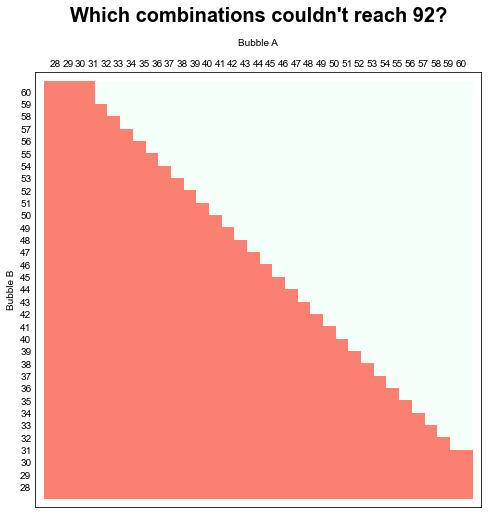

In [29]:
A = [n for n in range(28,61)]
B =  [n for n in range(28,61)]

fig, ax = plt.subplots()

i = 0
for a in A:
    
    colors = []
        
    for b in A:
     
        if a + b >= 92:
            c = 'mintcream'
            
        else:
            c = 'salmon'       # start with the assumption that the two teams do not play

        colors.append(c)
                           
    B = [28+i] * len(A)        
        
    ax.scatter(A, B, marker = 's', s = 500, color = colors)
    
    i += 1

# titles
plt.title("Which combinations couldn't reach 92?", weight='bold', size='20')

plt.xlabel('\nBubble A\n')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xticks(A[::1])

plt.ylabel('Bubble B')
ax.set_yticks(A[::1])

ax.tick_params(axis=u'both', which=u'both',length=0)    # hides ticks

fig.set_size_inches(8, 8)
plt.show()

To stop my computer burning out, I would like to narrow it down further though. 

How likely would it be that any low value will end up forming a double-bubble that gets a high result? 

The graph below takes all Bubbles with 58 or 60 games, and calculates against the full spectrums of Bubbles.

.


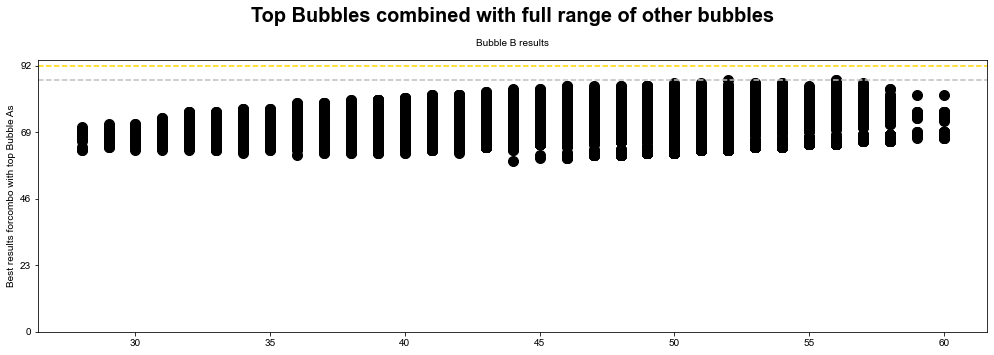

In [30]:
print('.')

a1, a2 = 58, 60
Xdf = nocompsdf.loc[(nocompsdf['Ttl'] >= a1) & (nocompsdf['Ttl'] <= a2)]

b1, b2 = 28, 60
Ydf = nocompsdf.loc[(nocompsdf['Ttl'] >= b1) & (nocompsdf['Ttl'] <= b2)]

gamesX, gamesY = list(Xdf['Games']), list(Ydf['Games'])
idX, idY = list(Xdf['GroupID']), list(Ydf['GroupID'])
Alist, Blist, ABlist, clist = [], [], [], []

i = 0
for x in range(len(idX)):
    A = gamesX[i]
   
    j = i+1
    
    for y in range(len(idY) - j):
        
        if idX[i] != idY[j]:                           # stops it re-bubbling with itself
            
            B = gamesY[j]

            AB = A + list(set(B) - set(A))

            Alist.append(len(A))
            Blist.append(len(B))
            ABlist.append(len(AB))
            
            #if len(AB) > 85:
                #print(f'{idX[i]}, {idY[j]},   \t\t{len(AB)}, \t{len(A)}, {len(B)}, \t\tin {time.time() - start_time} seconds.')
     
        j += 1  
    
    i += 1
    
    
# plot
fig, ax = plt.subplots()

plt.title("Top Bubbles combined with full range of other bubbles", weight='bold', size='20')
ax.xaxis.set_label_position('top') 

ax = ax.scatter(Blist, ABlist, s = 100, color='k')

plt.axhline(92, color = 'gold', linestyle = 'dashed')
plt.axhline(87, color = 'silver', linestyle = 'dashed')

plt.xlabel('\nBubble B results\n')

plt.ylabel(f'Best results forcombo with top Bubble As')
plt.yticks([0,23,46,69,92])
plt.ylim(0,94)


fig.set_size_inches(17, 5)
plt.show()

As you can see, it is only once we get into the top half of Bubble results that we can achieve at least 87. 

(87 is the top result I've been able to find.)

Therefore we can fairly confidently narrow down the search to all Bubbles with reults of 45 or above. 

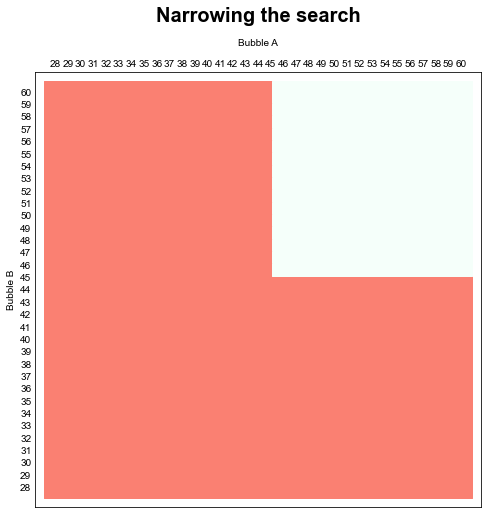

In [31]:
A = [n for n in range(28,61)]
B =  [n for n in range(28,61)]

fig, ax = plt.subplots()

i = 0
for a in A:
    
    colors = []
        
    for b in A:
            
        if a > 45 and b > 45:
            
            c = 'mintcream'
            
        else:
        
            c = 'salmon'       # start with the assumption that the two teams do not play

                
        colors.append(c)
                           
    B = [28+i] * len(A)        
        
    ax.scatter(A, B, marker = 's', s = 500, color = colors)
    
    i += 1

# titles
plt.title("Narrowing the search", weight='bold', size='20')
plt.xlabel('\nBubble A\n')
ax.xaxis.set_label_position('top') 
plt.ylabel('Bubble B')

# axes
ax.xaxis.tick_top()
ax.set_xticks(A[::1])
ax.set_yticks(A[::1])

ax.tick_params(axis=u'both', which=u'both',length=0)    # hides ticks

plt.rcParams["font.family"] = "Arial"

fig.set_size_inches(8, 8)
plt.show()

This last step is not a very scientific approach, but in the circumstances, it seems justifiable.

In fact, because of memory issues, I have narrowed it downfurther, to a results of 50 or above.

In [38]:
bestdf = nocompsdf.loc[nocompsdf['Ttl'] >= 50]

bestdf

,GroupID,A1,A2,Games,Ttl
129,129,"[AFC, ARS, AST, BRI, BUR, CHE, CRY, LIV, MCI, WOL]","[EVE, LEI, MUN, NEW, NOR, SHE, SOU, TOT, WAT, WES]","[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 15, 16, 18, 20, 22, 23, 24, 26, 30, 31, 32, 33, 39, 41, 44, 45, 47, 51, 53, 54, 55, 56, 57, 61, 62, 63, 67, 68, 69, 71, 73, 75, 76, 78, 79, 81, 83, 84, 87, 90]",51
1010,1010,"[AFC, ARS, AST, BRI, BUR, CRY, EVE, LEI, LIV, WOL]","[CHE, MCI, MUN, NEW, NOR, SHE, SOU, TOT, WAT, WES]","[2, 3, 5, 7, 9, 10, 12, 15, 16, 18, 20, 21, 22, 23, 24, 26, 29, 31, 32, 34, 37, 39, 40, 41, 43, 46, 47, 51, 52, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 66, 69, 71, 73, 76, 80, 81, 83, 86, 88, 90]",50
1234,1234,"[AFC, ARS, AST, BRI, BUR, CRY, LEI, LIV, MUN, TOT]","[CHE, EVE, MCI, NEW, NOR, SHE, SOU, WAT, WES, WOL]","[2, 3, 5, 7, 8, 9, 13, 15, 16, 21, 22, 24, 25, 29, 32, 34, 36, 37, 39, 40, 42, 43, 45, 46, 47, 49, 50, 51, 52, 54, 56, 57, 58, 59, 60, 61, 62, 64, 65, 71, 73, 78, 79, 80, 83, 84, 85, 87, 88, 90]",50
1237,1237,"[AFC, ARS, AST, BRI, BUR, CRY, LEI, LIV, MUN, WOL]","[CHE, EVE, MCI, NEW, NOR, SHE, SOU, TOT, WAT, WES]","[2, 3, 5, 7, 12, 13, 15, 16, 18, 21, 22, 23, 24, 25, 26, 29, 32, 33, 34, 36, 37, 39, 40, 41, 43, 45, 46, 47, 49, 51, 52, 54, 56, 57, 59, 61, 62, 63, 64, 65, 69, 71, 73, 78, 80, 81, 83, 87, 88, 90]",50
1326,1326,"[AFC, ARS, AST, BRI, BUR, CRY, LEI, MUN, TOT, WOL]","[CHE, EVE, LIV, MCI, NEW, NOR, SHE, SOU, WAT, WES]","[2, 3, 5, 7, 9, 10, 13, 16, 18, 21, 22, 24, 25, 26, 29, 30, 32, 34, 36, 37, 40, 41, 42, 43, 45, 46, 47, 49, 52, 56, 57, 59, 60, 61, 63, 64, 65, 71, 73, 75, 78, 79, 80, 81, 83, 85, 87, 88, 89, 90]",50
...,...,...,...,...,...
92288,92288,"[AFC, LEI, MCI, MUN, NEW, NOR, SOU, TOT, WAT, WES]","[ARS, AST, BRI, BUR, CHE, CRY, EVE, LIV, SHE, WOL]","[1, 2, 5, 6, 9, 10, 11, 12, 15, 22, 24, 26, 28, 32, 34, 36, 38, 39, 41, 42, 44, 46, 47, 50, 51, 52, 54, 55, 56, 57, 58, 59, 61, 62, 63, 66, 68, 69, 71, 72, 73, 75, 76, 78, 79, 80, 81, 83, 84, 87, 88]",51
92293,92293,"[AFC, LEI, MCI, MUN, NEW, SHE, SOU, TOT, WAT, WES]","[ARS, AST, BRI, BUR, CHE, CRY, EVE, LIV, NOR, WOL]","[1, 3, 5, 6, 9, 10, 12, 13, 15, 20, 22, 23, 24, 26, 27, 28, 32, 34, 35, 36, 39, 41, 42, 44, 46, 51, 52, 54, 55, 57, 58, 61, 62, 63, 64, 66, 67, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 83, 84, 87, 90]",52
92314,92314,"[AFC, LEI, MUN, NEW, NOR, SHE, SOU, TOT, WAT, WES]","[ARS, AST, BRI, BUR, CHE, CRY, EVE, LIV, MCI, WOL]","[0, 1, 2, 3, 4, 5, 6, 9, 10, 12, 15, 16, 20, 22, 23, 24, 26, 28, 30, 32, 36, 39, 41, 42, 44, 47, 51, 52, 53, 54, 55, 56, 57, 58, 61, 62, 63, 66, 67, 69, 71, 72, 73, 75, 76, 79, 81, 83, 84, 87, 90]",51
92320,92320,"[AFC, LEI, MUN, NEW, SHE, SOU, TOT, WAT, WES, WOL]","[ARS, AST, BRI, BUR, CHE, CRY, EVE, LIV, MCI, NOR]","[0, 1, 3, 4, 5, 6, 8, 9, 10, 12, 13, 15, 16, 18, 20, 22, 23, 24, 27, 28, 30, 32, 35, 36, 39, 42, 44, 50, 51, 52, 53, 54, 55, 57, 61, 62, 64, 66, 67, 69, 71, 72, 73, 75, 76, 77, 79, 83, 87, 88, 90]",51


We now have less than 28,000 rows to work with - which means much less than a trillion calculations to do. 

### LET'S GO!

In [39]:
print('.')

start_time = time.time()

games = list(bestdf['Games'])
ids = list(bestdf['GroupID'])

quickd = {}
resultsl = []

i = 0
for x in range(len(ids)):
    
    quickd[ids[i]] = {}
    quickd[ids[i]][ids[i]] = ''

    A = games[i]
   
    j = i+1
    for y in range(len(ids) - j):
        
        B = games[j]
        
        AB = A + list(set(B) - set(A))
 
        quickd[ids[i]][ids[j]] = len(AB)
        
     
        if len(AB) > 84:
            print(f'{i},\t\t{ids[i]}, {ids[j]}, \t\t{len(AB)}, \t{len(A)},{len(B)}, \t\tin {time.time() - start_time} seconds.')
            
        if len(AB) >= 87:
            
            l = [len(A),len(B), ids[i], ids[j]]
            resultsl.append(l)
            
            
        j += 1  
            
    i += 1
        
print(f'{time.time() - start_time} seconds.')

.
113,		6532, 63293, 		85, 	55,58, 		in 9.211306095123291 seconds.
168,		8097, 65416, 		85, 	51,58, 		in 13.354844570159912 seconds.
191,		10161, 63293, 		85, 	53,58, 		in 15.11231017112732 seconds.
229,		13164, 59861, 		85, 	55,56, 		in 17.950302362442017 seconds.
314,		14617, 59861, 		85, 	51,56, 		in 23.70535898208618 seconds.
349,		16076, 29409, 		85, 	56,56, 		in 26.015591144561768 seconds.
360,		16122, 29227, 		85, 	55,56, 		in 26.750199794769287 seconds.
379,		16256, 29227, 		85, 	57,56, 		in 27.967546224594116 seconds.
379,		16256, 29409, 		85, 	57,56, 		in 27.967546224594116 seconds.
379,		16256, 29487, 		85, 	57,54, 		in 27.967546224594116 seconds.
379,		16256, 30396, 		85, 	57,54, 		in 27.983171939849854 seconds.
379,		16256, 55437, 		86, 	57,54, 		in 27.983171939849854 seconds.
379,		16256, 56184, 		85, 	57,52, 		in 27.983171939849854 seconds.
379,		16256, 56457, 		86, 	57,54, 		in 27.983171939849854 seconds.
380,		16259, 29483, 		85, 	55,56, 		in 28.030049800872803 seconds

In [40]:
quickdf = pd.DataFrame(quickd)

quickdf

,129,1010,1234,1237,1326,1400,1897,2570,2572,2581,...,92141,92149,92151,92155,92278,92288,92293,92314,92320,92368
129,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,67,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234,73,65,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1237,67,59,59,,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1326,72,65,59,59,,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92288,67,66,69,69,71,71,73,74,75,74,...,64,67,72,72,60,,NaN,NaN,NaN,NaN
92293,66,67,73,71,74,71,70,74,74,74,...,66,67,72,68,59,61,,NaN,NaN,NaN
92314,59,66,73,71,73,67,70,74,74,74,...,67,59,66,66,60,61,60,,NaN,NaN
92320,65,71,73,74,76,71,66,72,72,74,...,73,66,65,59,66,68,61,60,,NaN


In [41]:
for i in resultsl:
    print(i)

[59, 56, 16262, 29409]
[57, 56, 18125, 29227]
[57, 54, 18125, 56457]
[56, 58, 29227, 41148]
[52, 58, 55452, 65416]


### FINAL STEP

There are five combinations of double-bubbles found that produce a result of 87 matches. 

This still leaves five games remaing, but it is very close to achieveing the desired outcome. 

The final step is to see which of these combinations would require the least chopping and changing. 

In [58]:
# a quick check of one of the combos

a = set(nocompsdf['Games'][16262])
b = set(nocompsdf['Games'][29409])

AB = list(a) + list(b - a)
len(AB)

87

In [155]:
def finalStep(first, second):
    
    a1 = set(nocompsdf['A1'][first])
    a2 = [x for x in list(teams) if x not in nocompsdf['A1'][first]]
    b1 = set(nocompsdf['A1'][second])
    b2 = [x for x in list(teams) if x not in nocompsdf['A1'][second]]

    print(f'{first} ∩ {second}')
    print('A1∩B1 =', len(a1.intersection(b1)), a1.intersection(b1))
    print('A1∩B2 =', len(a1.intersection(b2)), a1.intersection(b2))
    
    print()
    
for i in resultsl:
    first = i[2]
    second = i[3]
    finalStep(first, second)

16262 ∩ 29409
A1∩B1 = 5 {'LEI', 'ARS', 'MUN', 'EVE', 'AFC'}
A1∩B2 = 5 {'TOT', 'SHE', 'CRY', 'WOL', 'AST'}

18125 ∩ 29227
A1∩B1 = 5 {'LEI', 'ARS', 'SOU', 'EVE', 'AFC'}
A1∩B2 = 5 {'TOT', 'SHE', 'MUN', 'WOL', 'AST'}

18125 ∩ 56457
A1∩B1 = 5 {'TOT', 'AST', 'WOL', 'AFC', 'SHE'}
A1∩B2 = 5 {'LEI', 'ARS', 'SOU', 'MUN', 'EVE'}

29227 ∩ 41148
A1∩B1 = 5 {'LEI', 'ARS', 'SOU', 'EVE', 'AFC'}
A1∩B2 = 5 {'MCI', 'WAT', 'BRI', 'NOR', 'LIV'}

55452 ∩ 65416
A1∩B1 = 5 {'AST', 'CRY', 'EVE', 'AFC', 'SHE'}
A1∩B2 = 5 {'NOR', 'CHE', 'WOL', 'BUR', 'LIV'}



As we see, each group has exactly 5 teams that would need to shift from each pool. 

So let's look at the games that each combo would have left over. 

In [127]:
import collections

def finalStepGames(first, second):
    
    t = []
    
    a1 = set(nocompsdf['Games'][first])
    b1 = set(nocompsdf['Games'][second])

    print(f'{first} ∩ {second}')
    played = list(a1) + list(b1 - a1)
    all = range(0,92)
    rems = set(all) - set(played)
    print('Remaining games =')
    
    for rem in rems:
        print(f"{rem}: {remaining[rem][0]} vs {remaining[rem][1]}")
        
        t.append(remaining[rem][0])
        t.append(remaining[rem][1])
    
    #print(t)
    
    x = Counter(t)
    print(x)
    
    print()
    
for i in resultsl:
    first = i[2]
    second = i[3]
    finalStepGames(first, second)

16262 ∩ 29409
Remaining games =
10: EVE vs LIV
76: MUN vs WES
90: SOU vs SHE
28: AFC vs NEW
62: ARS vs LIV
Counter({'LIV': 2, 'EVE': 1, 'MUN': 1, 'WES': 1, 'SOU': 1, 'SHE': 1, 'AFC': 1, 'NEW': 1, 'ARS': 1})

18125 ∩ 29227
Remaining games =
37: LEI vs CRY
39: LIV vs AST
7: AFC vs CRY
25: BRI vs MUN
28: AFC vs NEW
Counter({'CRY': 2, 'AFC': 2, 'LEI': 1, 'LIV': 1, 'AST': 1, 'BRI': 1, 'MUN': 1, 'NEW': 1})

18125 ∩ 56457
Remaining games =
65: CRY vs MUN
68: MCI vs AFC
37: LEI vs CRY
39: LIV vs AST
76: MUN vs WES
Counter({'CRY': 2, 'MUN': 2, 'MCI': 1, 'AFC': 1, 'LEI': 1, 'LIV': 1, 'AST': 1, 'WES': 1})

29227 ∩ 41148
Remaining games =
66: EVE vs AST
73: AST vs ARS
15: LIV vs CRY
25: BRI vs MUN
28: AFC vs NEW
Counter({'AST': 2, 'EVE': 1, 'ARS': 1, 'LIV': 1, 'CRY': 1, 'BRI': 1, 'MUN': 1, 'AFC': 1, 'NEW': 1})

55452 ∩ 65416
Remaining games =
2: NOR vs SOU
68: MCI vs AFC
73: AST vs ARS
89: NEW vs LIV
91: WES vs AST
Counter({'AST': 2, 'NOR': 1, 'SOU': 1, 'MCI': 1, 'AFC': 1, 'ARS': 1, 'NEW': 1, 'LIV

There are two combos that only require eight teams. These are:

    18125 ∩ 29227
    
    18125 ∩ 56457

As the main point of having bubbles is to limit movement around the UK (to stop the spread of the virus), it clearly comes down to a choice between these two combos. 

Picking one of these pools means Crystal Palace will play just 7 games in the initial stages, compared to the 9 played by most teams and the 10 played by some. 

But scheduling concerns are far outweighed by the need to limit movement. 

That said, scheduling will be the deciding factor in which combo we choose. 

As was noted at the beginning, most teams have nine games left. But four - ARS, AST, MCI, SHE - have ten. 

Let's look at how each of these teams features in the final two combos.

In [153]:
combo1812529227 = [0,1,0,0]      # calculated by hand
combo1812556457 = [0,1,1,0]

In [152]:
finaldf = pd.DataFrame(index= ['ARS','AST', 'MCI', 'SHE'], columns = ['18125 ∩ 29227', '18125 ∩ 56457'])

finaldf['18125 ∩ 29227'] = combo1812529227
finaldf['18125 ∩ 56457'] = combo1812556457

finaldf

,18125 ∩ 29227,18125 ∩ 56457
ARS,0,0
AST,1,1
MCI,0,1
SHE,0,0


So it is that Bubbles 18125 and 56427 are the ideal combination!

In [164]:
print('First Bubbles (18125)')
print('A1',list(nocompsdf['A1'][18125]))
print('A2',[x for x in list(teams) if x not in nocompsdf['A1'][18125]])

print('\nSecond Bubbles (56427)')

print('B1', list(nocompsdf['A1'][56427]))
print('B2',[x for x in list(teams) if x not in nocompsdf['A1'][56427]])



First Bubbles
A1 ['AFC', 'ARS', 'AST', 'EVE', 'LEI', 'MUN', 'SHE', 'SOU', 'TOT', 'WOL']
A2 ['BRI', 'BUR', 'CHE', 'CRY', 'LIV', 'MCI', 'NEW', 'NOR', 'WAT', 'WES']

Second Bubbles
B1 ['AFC', 'AST', 'BUR', 'CHE', 'CRY', 'MUN', 'SOU', 'WAT', 'WES', 'WOL']
B2 ['ARS', 'BRI', 'EVE', 'LEI', 'LIV', 'MCI', 'NEW', 'NOR', 'SHE', 'TOT']


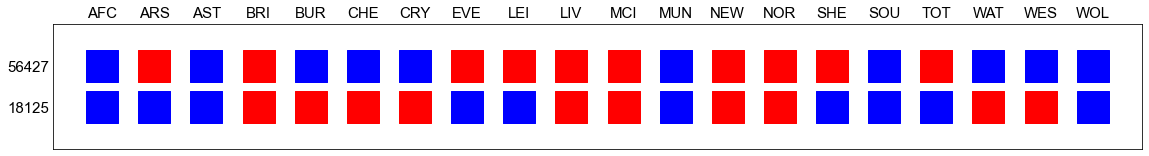

In [205]:
fig, ax = plt.subplots()

X = [x for x in nocompsdf['A1'][18125]]
Y = [y for y in nocompsdf['A1'][56427]]



for t in teams:
    
    if t in X:
        c1 = 'blue'  
    else:   
        c1 = 'red'
        
    if t in Y:
        c2 = 'blue'  
    else:   
        c2 ='red'
    
    plt.scatter(t, 1, marker = 's', s = 1000, color = c1)
    
    plt.scatter(t, 2, marker = 's', s = 1000, color = c2)

    
ax.xaxis.tick_top()
ax.set_xticklabels(teams)
ax.xaxis.set_tick_params(labelsize=15)


y_values = ["18125", "56427"]
y_axis = np.arange(1, 3, 1)
plt.yticks(y_axis, y_values)
ax.yaxis.set_tick_params(labelsize=15)


plt.ylim(0,3)
ax.tick_params(axis=u'both', which=u'both',length=0)    # hides ticks

fig.tight_layout()
fig.set_size_inches(18, 2)
plt.show()

Blue = team is in main pool of the bubble.
Red = in complemeentary pool.

We can see here which teams will be moving (they can colors) and which will be staying put (no change).

And with that, my poor old computer needs a rest!

**--- END ---**